<a href="https://colab.research.google.com/github/Tahmina-cloud/AI-Projects/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --quiet diffusers transformers accelerate scipy safetensors

# 🔌 Import libraries
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# ⚙️ Load the model (bfloat16 is compatible with T4 GPUs)
model_id = "runwayml/stable-diffusion-v1-5"

# Turn off mem-efficient SDP to support older GPUs
torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_flash_sdp(False)

pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.bfloat16
).to("cuda")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image 1 with prompt: a classroom, photorealistic, winter, snowy outside, more snow on the ground


  0%|          | 0/20 [00:00<?, ?it/s]

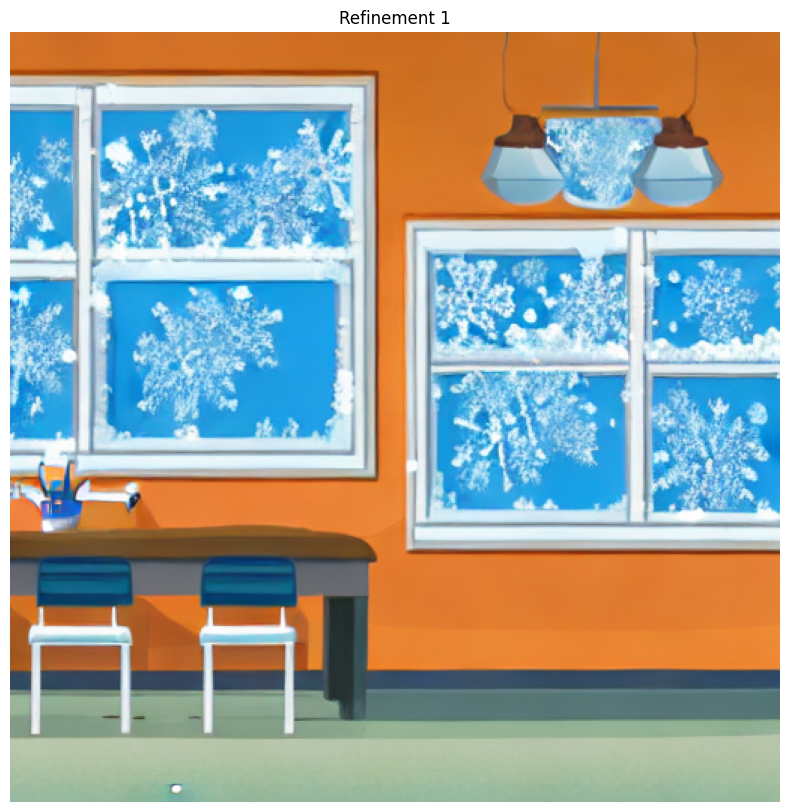

Generating image 2 with prompt: a classroom, photorealistic, winter, snowy outside, more snow on the ground, soft light from the window


  0%|          | 0/20 [00:00<?, ?it/s]

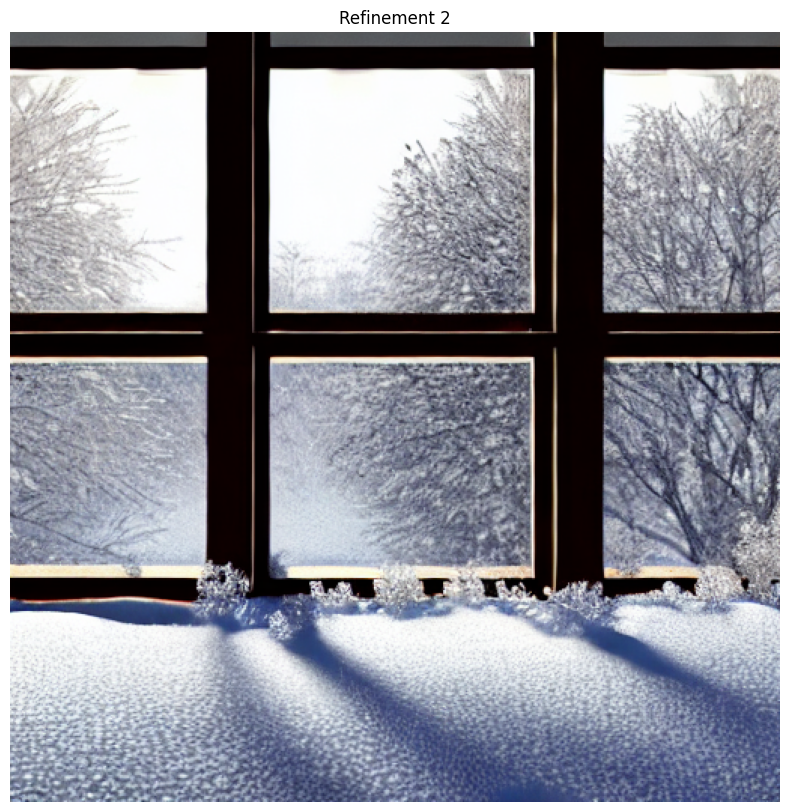

Generating image 3 with prompt: a classroom, photorealistic, winter, snowy outside, more snow on the ground, soft light from the window, students sitting inside


  0%|          | 0/20 [00:00<?, ?it/s]

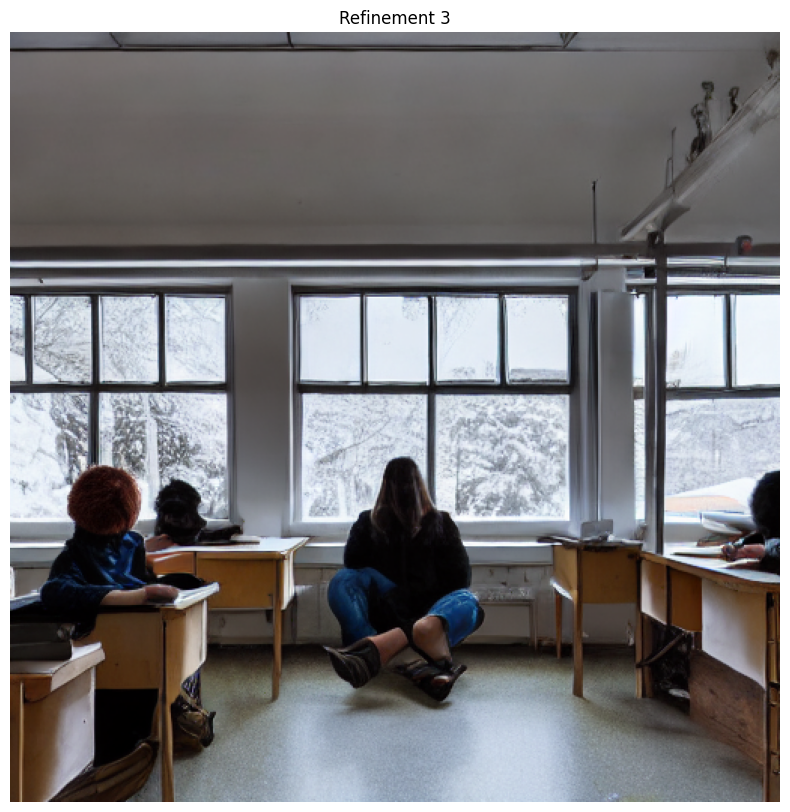

Generating image 4 with prompt: a classroom, photorealistic, winter, snowy outside, more snow on the ground, soft light from the window, students sitting inside, snow falling outside


  0%|          | 0/20 [00:00<?, ?it/s]

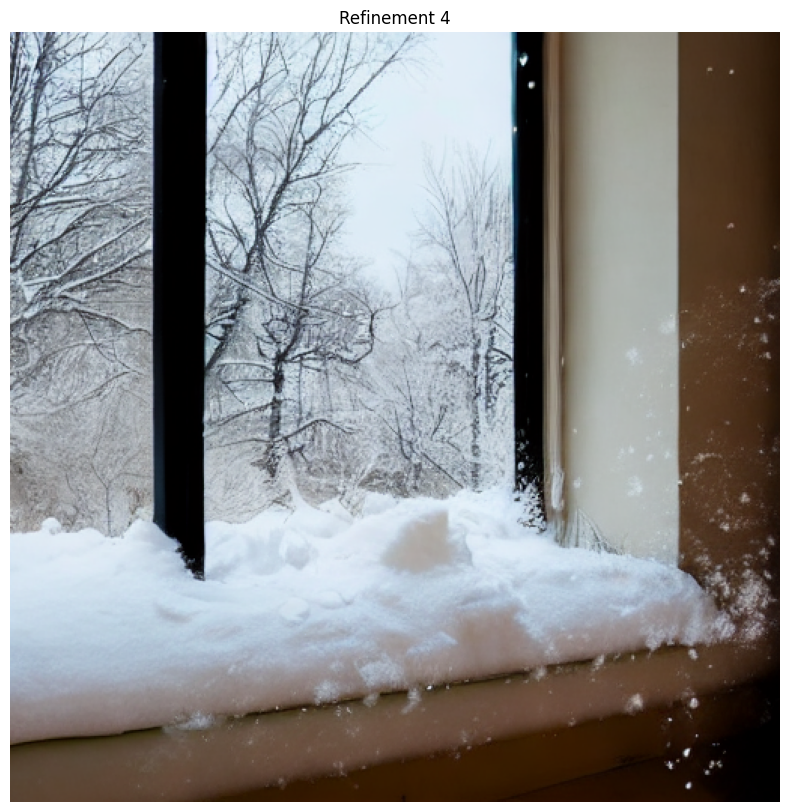

In [3]:

# 📜 Starting prompt and iterative modifications
base_prompt = "a classroom, photorealistic, winter, snowy outside"
prompts = [base_prompt]
images = []
steps = 20  # inference steps

# 🔁 Iterative refinement: each time we slightly enhance the scene
refinements = [
    ", more snow on the ground",
    ", soft light from the window",
    ", students sitting inside",
    ", snow falling outside",
]

for i, ref in enumerate(refinements):
    prompt = prompts[-1] + ref
    prompts.append(prompt)
    print(f"Generating image {i+1} with prompt: {prompt}")
    image = pipe(prompt, num_inference_steps=steps).images[0]
    images.append(image)

    # 🖼️ Show the image right after it's generated
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Refinement {i+1}")
    plt.show()
